# Projeto Churn - Análise da Semana 2

EDA, Pré-processamento e Modelo Base.

## Passo 0: Preparação

Importar as bibliotecas.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Passo 1: Carregar os Dados

Fazer o carregamento do Dataset.

In [ ]:
from google.colab import files

uploaded = files.upload()


file_name = list(uploaded.keys())[0]


try:
    df = pd.read_csv(file_name)
    print(f"Arquivo '{file_name}' carregado com sucesso no DataFrame 'df'!")
except Exception as e:
    print(f"Houve um erro ao ler o arquivo: {e}")

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv
Arquivo 'WA_Fn-UseC_-Telco-Customer-Churn.csv' carregado com sucesso no DataFrame 'df'!


## Passo 2: Inspeção Inicial

Vamos fazer 3 verificações rápidas para entender nossos dados.

### 2.1) `df.head()` - A Primeira Visão

Vamos ver as 5 primeiras linhas para ter certeza de que os dados foram carregados corretamente e ver o nome das colunas.

In [ ]:
# Exibe as 5 primeiras linhas do DataFrame
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.2) `df.info()` - O Raio-X dos Dados

Este é talvez **o comando mais importante** da inspeção inicial. Ele nos diz:
1.  Quantas linhas temos.
2.  Quais colunas têm dados faltando.
3.  Qual é o **tipo** de cada coluna (Número, Texto, etc.).

In [ ]:
# Exibe o "Raio-X" do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2.3) `value_counts()` - Entendendo nosso Alvo

Checar a coluna mais importante: `Churn`. Queremos saber qual a porcentagem de clientes que cancelou ("Sim") vs. os que ficaram ("Não").

In [ ]:
# Calcula a porcentagem de cada valor na coluna 'Churn'
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print("Distribuição da nossa coluna 'Churn':")
print(churn_percentage)

Distribuição da nossa coluna 'Churn':
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


---

## Passo 3: Análise Visual


### Gráfico 1: Tipo de Contrato vs. Churn

Vamos usar um gráfico de contagem para ver dentro de cada tipo de contrato, quantos clientes deram Churn ('Yes') e quantos ficaram ('No').

Analisando Contrato vs Churn...


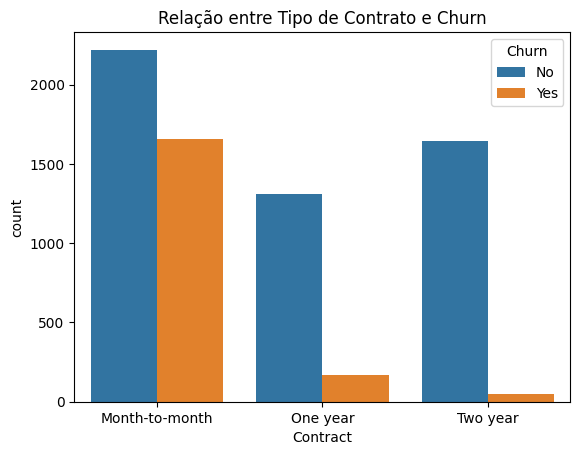

In [ ]:
print("Analisando Contrato vs Churn...")
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Relação entre Tipo de Contrato e Churn')
plt.show()

### Gráfico 2: Cobrança Mensal vs. Churn

Vamos usar um boxplot para comparar a distribuição das cobranças mensais entre quem deu Churn e quem não deu.

Analisando Cobrança Mensal vs Churn...


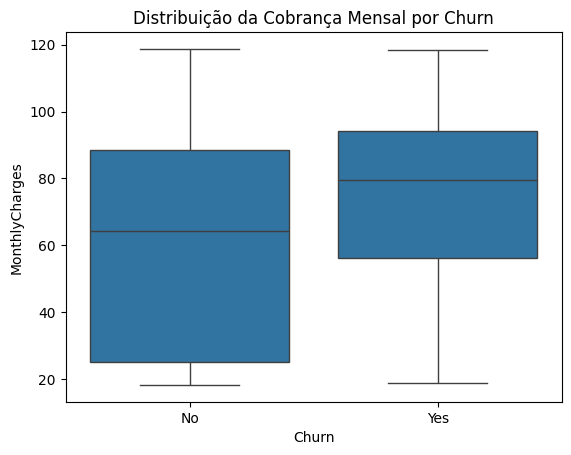

In [ ]:
print("Analisando Cobrança Mensal vs Churn...")
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Distribuição da Cobrança Mensal por Churn')
plt.show()

### Gráfico 3: Tempo de Casa (Tenure) vs. Churn

Vamos fazer a mesma análise de boxplot para o 'tenure' (tempo de casa em meses).

Analisando Tempo de Casa (Tenure) vs Churn...


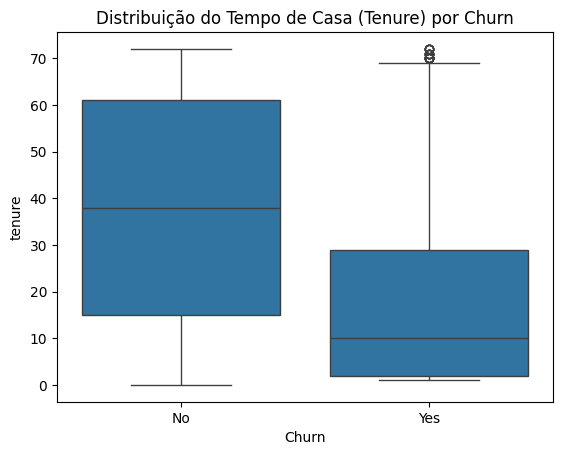

In [ ]:
print("Analisando Tempo de Casa (Tenure) vs Churn...")
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Distribuição do Tempo de Casa (Tenure) por Churn')
plt.show()

## Passo 4: Pré-processamento e Feature Engineering

Agora vamos "limpar a casa". O modelo de machine learning não entende texto (como 'Yes', 'No', 'Male', 'Female'). Além disso, temos que corrigir aquela coluna `TotalCharges` que o `df.info()` nos mostrou que é um `object` (texto).

### 4.1) Corrigindo `TotalCharges`

In [ ]:
# O pd.to_numeric(..., errors='coerce') é um truque: ele tenta transformar em número.
# Se ele não conseguir (porque o valor é um espaço em branco ' '), ele força o valor a virar 'NaN' (Nulo).
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Agora, vamos checar quantos valores nulos (NaN) nós criamos
print(f"Total de valores nulos em TotalCharges: {df['TotalCharges'].isnull().sum()}")

# Como são poucos, podemos simplesmente apagar essas linhas do dataset
df.dropna(subset=['TotalCharges'], inplace=True)

# Vamos checar de novo se limpamos tudo
print(f"Valores nulos restantes: {df['TotalCharges'].isnull().sum()}")

Total de valores nulos em TotalCharges: 11
Valores nulos restantes: 0


### 4.2) Transformando Colunas de Texto em Números

Vamos transformar todas as colunas que são texto (`object`) em números.
Vamos também apagar a `customerID`, pois ela é só um código de identificação e não ajuda o modelo a prever.

In [ ]:
# Primeiro, vamos criar uma cópia limpa do df para o modelo
df_modelo = df.copy()

# Apagando a coluna inútil
df_modelo = df_modelo.drop('customerID', axis=1)

# Usando o pd.get_dummies() - é a forma mais fácil de transformar texto em colunas numéricas (0 ou 1)
# Ele vai pegar uma coluna como 'Contract' e criar 3 novas: 'Contract_Month-to-month', 'Contract_One-year', 'Contract_Two-year'
# E vai preencher com 1 ou 0 para cada cliente.
df_modelo = pd.get_dummies(df_modelo, drop_first=True) # drop_first=True é uma boa prática para evitar redundância

print("DataFrame pronto para o modelo:")
df_modelo.head() # Veja como a coluna 'Churn_Yes' apareceu (valendo 0 ou 1) e as outras de texto sumiram.

DataFrame pronto para o modelo:


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True


In [ ]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   bool   
 5   Partner_Yes                            7032 non-null   bool   
 6   Dependents_Yes                         7032 non-null   bool   
 7   PhoneService_Yes                       7032 non-null   bool   
 8   MultipleLines_No phone service         7032 non-null   bool   
 9   MultipleLines_Yes                      7032 non-null   bool   
 10  InternetService_Fiber optic            7032 non-null   bool   
 11  InternetS

## Passo 5: Implementação do Algoritmo Base

Vamos treinar nosso primeiro modelo. Vamos usar uma **Árvore de Decisão**.

In [ ]:
# Importando as ferramentas do scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 1. Separar os dados em X (Features) e y (Alvo)

# X = são TODAS as colunas que o modelo vai usar para aprender (as "perguntas")
# y = é a coluna que queremos prever (o "gabarito")

X = df_modelo.drop('Churn_Yes', axis=1)
y = df_modelo['Churn_Yes']           # O gabarito é SÓ a coluna Churn_Yes (0 ou 1)

print("Dados separados em X e y.")

Dados separados em X e y.


In [ ]:
# 2. Separar em dados de Treino e Teste
# Vamos usar 80% dos dados para o modelo aprender (treinar)
# E vamos guardar 20% para testar se ele aprendeu direito (a "prova final")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Temos {len(X_train)} linhas para treino e {len(X_test)} linhas para teste.")

Temos 5625 linhas para treino e 1407 linhas para teste.


In [ ]:
# 3. Criar e Treinar o Modelo Base
modelo_arvore = DecisionTreeClassifier(max_depth=5, random_state=42) # max_depth=5 para ela não ficar muito complexa

# Treinando o modelo com os dados de treino
modelo_arvore.fit(X_train, y_train)

print("Modelo de Árvore de Decisão treinado com sucesso!")

Modelo de Árvore de Decisão treinado com sucesso!


In [ ]:
# 4. Fazer Previsões e Checar a Acurácia
# Agora vamos usar o modelo treinado para ele prever os resultados dos dados de teste (que ele nunca viu)
previsoes = modelo_arvore.predict(X_test)

# Vamos comparar as previsões do modelo com o gabarito real (y_test)
acuracia = accuracy_score(y_test, previsoes)

print("--- RESULTADO DO MODELO BASE ---")
print(f"A acurácia do nosso primeiro modelo é: {acuracia * 100:.2f}%")
print(f"Isso significa que o modelo acertou a previsão para {acuracia * 100:.2f}% dos clientes do grupo de teste.")

--- RESULTADO DO MODELO BASE ---
A acurácia do nosso primeiro modelo é: 77.54%
Isso significa que o modelo acertou a previsão para 77.54% dos clientes do grupo de teste.


Conclusão da Semana 2

1.  **Fizemos o EDA** e descobrimos que 'Contrato Mensal', 'Cobrança Alta' e 'Pouco Tempo de Casa (tenure)' são os principais indicadores de Churn.
2.  **Limpamos os dados** (TotalCharges) e transformamos tudo em números (`get_dummies`).
3.  **Criamos um modelo base** de Árvore de Decisão e tivemos nossa primeira acurácia!

# Projeto Churn - Semana 3: Refinamento e Validação

**Objetivo:** Sair do nosso modelo base de 77.5% e encontrar o modelo mais robusto e preciso possível.

**Etapas:**
1.  **Otimização de Hiperparâmetros:** Encontrar a 'profundidade' ideal para nossa Árvore.
2.  **Validação Cruzada e Comparação:** Testar novos modelos (Regressão Logística, Random Forest) de forma confiável.
3.  **Análise de Métricas:** Ir além da Acurácia (Matriz de Confusão, Precision, Recall).
4.  **Análise de Risco:** Gerar a tabela de probabilidades (`.predict_proba()`).

## Passo 1: Otimização de Hiperparâmetros (Árvore de Decisão)

Na Semana 2, nós 'chutamos' `max_depth=5`. Agora, vamos descobrir cientificamente qual é a melhor profundidade. Vamos testar profundidades de 1 a 15 e ver qual dá a melhor acurácia **no teste**.

Para isso, precisamos dividir os dados em treino e teste *uma vez*.

Dados divididos: 5625 para treino, 1407 para teste.
Teste de profundidade concluído!


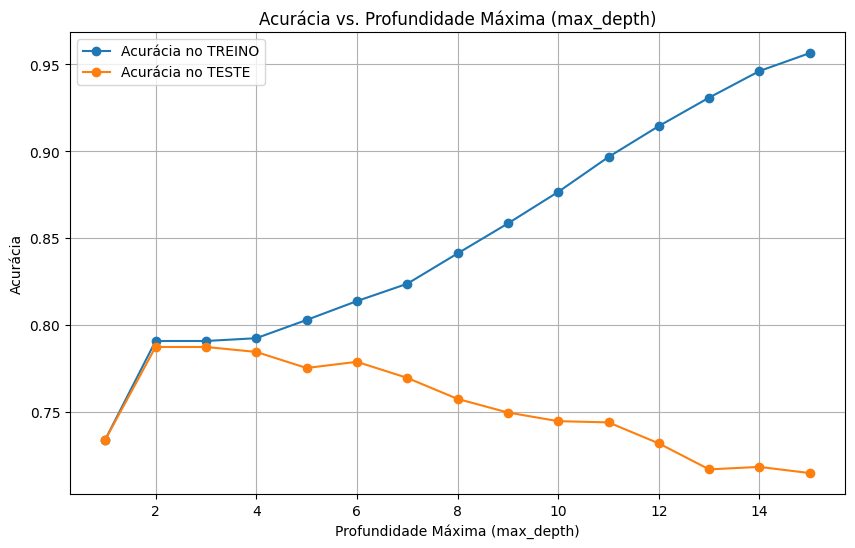


Melhor acurácia no TESTE: 78.75%
Melhor 'max_depth' encontrado: 2


In [ ]:
# Primeiro, vamos separar os dados em Treino e Teste (80/20)
# Usaremos 'random_state=42' para garantir que nossos resultados sejam sempre os mesmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dados divididos: {len(X_train)} para treino, {len(X_test)} para teste.")

# --- Loop de Teste do max_depth ---
acc_treino = []
acc_teste = []
intervalo_depth = range(1, 16)

for depth in intervalo_depth:
    modelo_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    modelo_temp.fit(X_train, y_train)

    acc_treino.append( accuracy_score(y_train, modelo_temp.predict(X_train)) )
    acc_teste.append( accuracy_score(y_test, modelo_temp.predict(X_test)) )

print("Teste de profundidade concluído!")

# --- Plotar o Gráfico ---
plt.figure(figsize=(10, 6))
plt.plot(intervalo_depth, acc_treino, label='Acurácia no TREINO', marker='o')
plt.plot(intervalo_depth, acc_teste, label='Acurácia no TESTE', marker='o')
plt.title('Acurácia vs. Profundidade Máxima (max_depth)')
plt.xlabel('Profundidade Máxima (max_depth)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

# Encontrar a melhor profundidade (o pico da linha laranja)
best_depth = intervalo_depth[acc_teste.index(max(acc_teste))]
print(f"\nMelhor acurácia no TESTE: {max(acc_teste)*100:.2f}%")
print(f"Melhor 'max_depth' encontrado: {best_depth}")

Vamos apenas importar as novas bibliotecas do Scikit-Learn que usaremos para esta etapa.

In [ ]:
# --- Preparação para a Semana 3 ---

# Importando as novas ferramentas de modelagem e métricas
from sklearn.model_selection import cross_val_score  # Para a Validação Cruzada
from sklearn.linear_model import LogisticRegression  # Novo modelo
from sklearn.ensemble import RandomForestClassifier   # Novo modelo
from sklearn.metrics import classification_report, confusion_matrix # Novas métricas

# Importando ferramentas que já usamos, só por garantia
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

print("Bibliotecas da Semana 3 importadas com sucesso.")
print("Os DataFrames 'X' e 'y' da Semana 2 estão prontos para serem usados.")


Bibliotecas da Semana 3 importadas com sucesso.
Os DataFrames 'X' e 'y' da Semana 2 estão prontos para serem usados.


## Passo 2: Validação Cruzada (Cross-Validation) e Comparação de Modelos

Agora temos nossa melhor Árvore de Decisão (`max_depth=2`). Mas será o melhor modelo?

Vamos compará-la com outros dois modelos famosos:
1.  **Regressão Logística:** Um modelo estatístico clássico, rápido e fácil de interpretar.
2.  **Random Forest:** Um modelo "comitê" que usa várias Árvores de Decisão (ex: 100) e faz uma "votação" entre elas. Geralmente é muito preciso.

Para ter uma nota "oficial" e confiável, vamos usar a **Validação Cruzada (CV)**. Ela vai re-embaralhar e testar os modelos 5 vezes (`cv=5`) e nos dar a média de acurácia. Isso evita que o resultado seja "sorte".

In [ ]:
# Vamos usar a melhor profundidade que encontramos no passo anterior
best_depth_encontrado = 2

# --- 1. Definir os Modelos ---
modelo_arvore = DecisionTreeClassifier(max_depth=best_depth_encontrado, random_state=42)
modelo_logistica = LogisticRegression(random_state=42, max_iter=1000) # max_iter=1000 para garantir que ele funcione
modelo_floresta = RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators=100 árvores

modelos = {
    "Árvore de Decisão (Otimizada)": modelo_arvore,
    "Regressão Logística": modelo_logistica,
    "Random Forest (100 árvores)": modelo_floresta
}

print("--- Iniciando Validação Cruzada (cv=5) --- ")
print("(Isso pode demorar alguns segundos...)")

# --- 2. Testar os Modelos com Validação Cruzada ---
resultados_cv = {}

for nome, modelo in modelos.items():
    # O cross_val_score usa os dados COMPLETOS (X, y)
    scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy')
    resultados_cv[nome] = scores.mean() # Guardamos a média das 5 rodadas
    print(f". Teste do modelo '{nome}' concluído.")

print("\n--- RESULTADOS DA VALIDAÇÃO CRUZADA ---")
for nome, media_acuracia in resultados_cv.items():
    print(f"Modelo: {nome} | Acurácia Média (cv=5): {media_acuracia * 100:.2f}%")

# --- 3. Escolher o Campeão ---
modelo_campeao_nome = max(resultados_cv, key=resultados_cv.get)
modelo_campeao = modelos[modelo_campeao_nome]

print(f"\nO nosso modelo 'Campeão' é o: {modelo_campeao_nome} com {resultados_cv[modelo_campeao_nome]*100:.2f}% de acurácia média!")

--- Iniciando Validação Cruzada (cv=5) --- 
(Isso pode demorar alguns segundos...)
. Teste do modelo 'Árvore de Decisão (Otimizada)' concluído.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

. Teste do modelo 'Regressão Logística' concluído.
. Teste do modelo 'Random Forest (100 árvores)' concluído.

--- RESULTADOS DA VALIDAÇÃO CRUZADA ---
Modelo: Árvore de Decisão (Otimizada) | Acurácia Média (cv=5): 78.98%
Modelo: Regressão Logística | Acurácia Média (cv=5): 80.35%
Modelo: Random Forest (100 árvores) | Acurácia Média (cv=5): 79.04%

O nosso modelo 'Campeão' é o: Regressão Logística com 80.35% de acurácia média!


## Passo 3: Análise de Métricas de Performance (O "Teste Estatístico")

Agora que temos o nosso modelo "Campeão", vamos analisá-lo a fundo.

Acurácia é bom, mas não é tudo. Queremos saber: o quão bom ele é em prever o "Sim" (Churn)?

Para isso, vamos usar o `X_test` e `y_test` que separamos no Passo 1 e analisar:
1.  **Matriz de Confusão:** Quantos "Sim" ele acertou? Quantos "Não" ele acertou? Quantos ele previu "Sim" mas eram "Não" (Falso Positivo)?
2.  **Relatório de Classificação:** Métricas de `Precision` e `Recall`.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Análise de Métricas do Modelo: Regressão Logística ---

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.83      0.89      0.86      1033
        True       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

Matriz de Confusão:


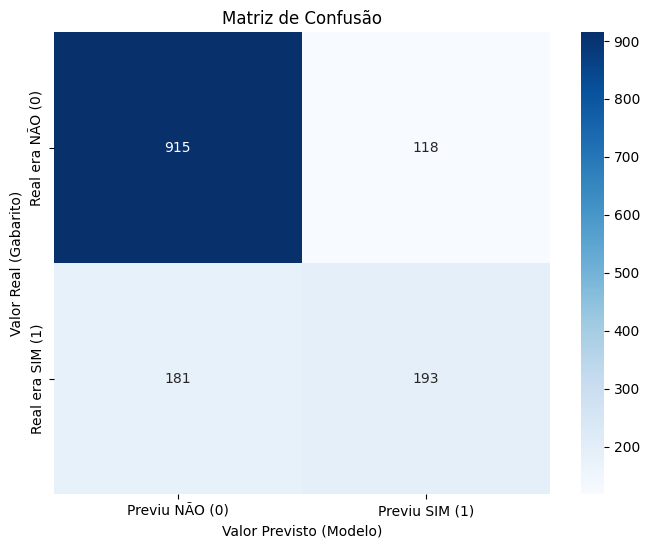

In [ ]:
# --- 1. Treinar o Modelo Campeão ---
# (Usamos X_train, y_train que já separamos no Passo 1)
modelo_campeao.fit(X_train, y_train)

# --- 2. Fazer as previsões no grupo de Teste ---
previsoes = modelo_campeao.predict(X_test)

print(f"--- Análise de Métricas do Modelo: {modelo_campeao_nome} ---")

# --- 3. Relatório de Classificação (Precision, Recall) ---
print("\nRelatório de Classificação:")
# O '1' é o 'Churn_Yes' (o que queremos prever)
# O '0' é o 'Churn_Não'
print(classification_report(y_test, previsoes))

# --- 4. Matriz de Confusão ---
print("Matriz de Confusão:")
matriz = confusion_matrix(y_test, previsoes)

# Plotar a Matriz de Confusão com o Seaborn para ficar bonita
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Previu NÃO (0)', 'Previu SIM (1)'],
            yticklabels=['Real era NÃO (0)', 'Real era SIM (1)'])
plt.ylabel('Valor Real (Gabarito)')
plt.xlabel('Valor Previsto (Modelo)')
plt.title('Matriz de Confusão')
plt.show()

## Passo 4: Análise de Risco (O Resultado Prático)

Como falamos, a empresa não quer um "Sim" ou "Não". Ela quer uma **"Nota de Risco"**.

Vamos usar a função `.predict_proba()` para gerar a probabilidade (de 0% a 100%) de Churn para cada cliente do grupo de teste (`X_test`).

Este é o resultado final que a empresa usaria para tomar uma ação.

In [ ]:
# 1. Gerar as probabilidades (igual a antes)
probabilidades = modelo_campeao.predict_proba(X_test)
prob_de_churn = probabilidades[:, 1]

# 2. Criar a Tabela de Risco INICIAL (igual a antes)
# Usamos o índice original do y_test para saber QUEM SÃO esses clientes
df_risco = pd.DataFrame({'Gabarito_Real_Cancelou': y_test, 'Nota_de_Risco_Churn': prob_de_churn})

# 3. O TRUQUE: Trazer o 'customerID' de volta usando o índice
# O nosso df original ainda tem o customerID. Vamos usar o .join() para pegá-lo.
df_risco = df_risco.join(df['customerID'])

# 4. Reorganizar as colunas para ficar bonito
df_risco = df_risco[['customerID', 'Gabarito_Real_Cancelou', 'Nota_de_Risco_Churn']]

# 5. Ordenar por risco
df_risco_ordenado = df_risco.sort_values(by='Nota_de_Risco_Churn', ascending=False)

print("--- TABELA FINAL DE RISCO (COM ID DO CLIENTE) ---")
print(df_risco_ordenado.head(20))

--- TABELA FINAL DE RISCO (COM ID DO CLIENTE) ---
      customerID  Gabarito_Real_Cancelou  Nota_de_Risco_Churn
1976  9497-QCMMS                    True             0.850468
6368  2720-WGKHP                    True             0.846597
3159  5150-ITWWB                   False             0.845696
997   1374-DMZUI                    True             0.845409
5783  1415-YFWLT                    True             0.825533
5933  6496-SLWHQ                    True             0.824427
3346  2545-EBUPK                   False             0.820272
2577  4910-GMJOT                    True             0.820056
1148  7851-WZEKY                    True             0.816326
1600  3068-OMWZA                    True             0.813752
4618  6350-XFYGW                   False             0.806799
1285  9134-CEQMF                    True             0.802418
7010  0723-DRCLG                    True             0.794712
5213  7668-XCFYV                   False             0.792693
6748  6230-BSUXY    